In [1]:
!pip install komm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.5 MB/s 
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56608 sha256=40c182e0cff5deb693b93a8d0034c2d89415b54265d8af4b0b612fb54b047e7e
  Stored in directory: /root/.cache/pip/wheels/67/d6/14/a8e4b0235b3dc3c8a28c4e2059b66ad5b8c262df15df54f843
Successfully built komm


In [96]:
# from typing import Final
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy as scy
import komm


from scipy.fftpack import fft
from numpy import pi
from numpy import sin
from numpy import cos
from numpy import r_
from scipy.signal import butter

import random
from numpy import random as rm

import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt


# Helper
def butterLowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter data that is sampled at fs using a low pass butterworth filter of order filt_order
def butterLowpassFilter(data, cutoff, fs, filt_order=5):
    b, a = butterLowpass(cutoff, fs, order=filt_order)
    y = lfilter(b, a, data)
    return y


def genSineWave(fc, fs, Ns, printDebug=False, plotDebug=False):
    ############################
    # PREAMBLE
    
    if printDebug:
        print("Sine wave samples: ", Ns)

    offset = int(random.random() * 100)
    t = r_[0.0+offset:Ns+offset]/fs            # time points
    
    carrier = cos(2*pi*fc*t) 
    SineWave = carrier

    return SineWave
def genSineWaveNoise(SNR, fc, fs, Ns, printDebug=False, plotDebug=False):

    SineWave = genSineWave(fc,fs,Ns)
    
    SNRRandRange = SNR - 0.5 + random.random()
    SNRLin = pow(10, SNRRandRange/10)
    SigPower = np.linalg.norm(SineWave)**2 / SineWave.size
    awgn = komm.AWGNChannel(SNRLin, SigPower)
    SineWave_Noise = awgn(SineWave)

    SineWave_NoiseNormal = SineWave_Noise/max(abs(SineWave_Noise))

    
    if plotDebug:
        plt.plot(SineWave_NoiseNormal)
        plt.show()
    
    
    return SineWave_NoiseNormal

def convertToIQ(SignalRecieved, fReciever, fs, plotDebug=False):
    offset = random.randint(0,200)
    t = r_[0.0+offset:len(SignalRecieved)+offset]/fs            # time points

    phase_shift = 2*pi * random.random()
    FinalSignal_I = SignalRecieved * cos(2*pi*fReciever*t + phase_shift)
    FinalSignal_Q = SignalRecieved * sin(2*pi*fReciever*t + phase_shift)

    FinalSignal_I_Filtered = butterLowpassFilter(FinalSignal_I, fReciever, fs)
    FinalSignal_Q_Filtered = butterLowpassFilter(FinalSignal_Q, fReciever, fs)
    if plotDebug:
        plt.plot(SignalRecieved)
        plt.plot(FinalSignal_I_Filtered)
        plt.plot(FinalSignal_Q_Filtered)
        plt.show()
    
    result = np.append([np.array(FinalSignal_I_Filtered)], [np.array(FinalSignal_Q_Filtered)],axis=0)
    return result

def genNoise(Ns, plotDebug=False):
    result = np.random.normal(size=(Ns))
    result = result / max(abs(result))
    if plotDebug:
      plt.plot(result)
      plt.show()
    return result


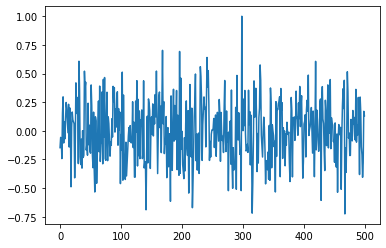

In [4]:
genNoise(500, True);

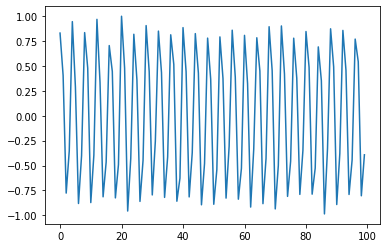

In [22]:
sine = genSineWaveNoise(20, fc, fs, 100, False, True);

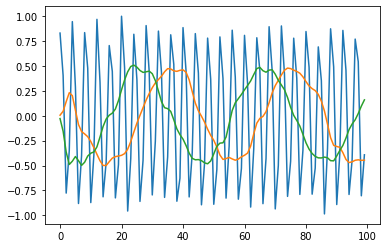

In [29]:
convertToIQ(sine, fc, fs, True);

In [107]:
fc = 1000000
fs = 4000000
SineWaves = []
Ns = 500
SamplesToGen = 1000
for i in range(0,SamplesToGen):
  temp = convertToIQ(genSineWaveNoise(20, fc, fs, Ns), fc, fs)
  # print(temp.shape)
  SineWaves.append(temp)
SineWaves = np.reshape(SineWaves,(SamplesToGen,Ns, 2))
np.array(SineWaves).shape

(1000, 500, 2)

In [105]:
Noise = []
Ns = 500
SamplesToGen = 1000
for i in range(0,SamplesToGen):
  temp = convertToIQ(genNoise(Ns), fc, fs)
  # print(temp.shape)
  Noise.append(temp)
Noise = np.reshape(SineWaves,(SamplesToGen,Ns, 2))
Noise.shape

(1000, 500, 2)

In [88]:

temp = convertToIQ(genSineWaveNoise(20, fc, fs, 100), fc, fs)

(2, 100)
